In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats

In [8]:
#read xcel data sheets
dfK9 = pd.read_excel('onerowperGene.xlsx',sheet_name='H3K9ac')
dfK27 = pd.read_excel('onerowperGene.xlsx',sheet_name='H3K27ac')

dfK9

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,CV_mean,CV_pvalue,CV_qvalue,CV_fdr_BH,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH
0,chr1_4783493_4786944,chr1,4783493,4786944,4,4785726,4787726,Mrpl15,-,0,...,109.151862,0.029306,0.001521,0.046045,74.257269,0.933138,355.239153,0.035213,0.003000,0.269018
1,chr1_4806713_4811238,chr1,4806713,4811238,6,4805893,4807893,Lypla1,+,0,...,205.718645,0.004738,0.000583,0.017650,88.160555,20.394261,565.183389,0.188224,0.003424,0.307075
2,chr1_4855961_4859931,chr1,4855961,4859931,7,4855694,4857694,Tcea1,+,0,...,129.027240,0.018230,0.001120,0.033909,85.351211,0.465709,388.566761,0.073235,0.003031,0.271816
3,chr1_5082507_5084687,chr1,5082507,5084687,8,5081173,5083173,Atp6v1h,+,0,...,86.824283,0.007804,0.000715,0.021643,59.936170,2.121451,272.175974,0.285309,0.004010,0.359593
4,chr1_6211969_6217033,chr1,6211969,6217033,9,6212662,6214662,Rb1cc1,+,0,...,255.993448,0.006191,0.000650,0.019664,86.027961,1.014155,660.824894,0.053991,0.003031,0.271816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,chrY_897172_899608,chrY,897172,899608,17782,895788,897788,Kdm5d,+,0,...,47.274716,0.012720,0.000911,0.027560,40.242580,0.376119,245.675463,0.099870,0.003045,0.273031
10879,chrY_1009337_1011988,chrY,1009337,1011988,17783,1008612,1010612,Eif2s3y,+,0,...,59.855685,0.000921,0.000321,0.009714,57.738414,2.203537,251.003387,0.301645,0.004119,0.369401
10880,chrY_1244057_1246429,chrY,1244057,1246429,17784,1245738,1247738,Uty,-,0,...,57.123919,0.002196,0.000436,0.013204,25.588807,0.280457,200.309732,0.131451,0.003084,0.276534
10881,chrY_1284701_1286964,chrY,1284701,1286964,17785,1286613,1288613,Ddx3y,-,0,...,58.839261,0.051769,0.002336,0.070689,46.007777,1.851386,241.583948,0.241422,0.003741,0.335484


In [9]:
#filter out the data based on CV p-value
#thep-value in metacycle result represent the periodicity of the data. (whether the genes are rhythmic or not) And indirectly corresponds to reliability of amplitude value
# dfK9 = dfK9[dfK9['CV_pvalue'] < 0.05]
# dfK9

In [10]:
#add relative amplitude values
dfK9['CV_rAMP'] = dfK9['CV_amplitude'] / dfK9['CV_mean']
dfK9['GF_rAMP'] = dfK9['GF_amplitude'] / dfK9['GF_mean']


#get relative amplitude fold change and difference between GF and CV

dfK9['rAMP_fold_diff'] = dfK9['CV_rAMP'] / dfK9['GF_rAMP']
dfK9['rAMP_diff'] = dfK9['CV_rAMP'] - dfK9['GF_rAMP']

dfK9

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH,CV_rAMP,GF_rAMP,rAMP_fold_diff,rAMP_diff
0,chr1_4783493_4786944,chr1,4783493,4786944,4,4785726,4787726,Mrpl15,-,0,...,74.257269,0.933138,355.239153,0.035213,0.003000,0.269018,0.481947,0.209035,2.305585,0.272913
1,chr1_4806713_4811238,chr1,4806713,4811238,6,4805893,4807893,Lypla1,+,0,...,88.160555,20.394261,565.183389,0.188224,0.003424,0.307075,0.528682,0.155986,3.389294,0.372696
2,chr1_4855961_4859931,chr1,4855961,4859931,7,4855694,4857694,Tcea1,+,0,...,85.351211,0.465709,388.566761,0.073235,0.003031,0.271816,0.485485,0.219656,2.210202,0.265829
3,chr1_5082507_5084687,chr1,5082507,5084687,8,5081173,5083173,Atp6v1h,+,0,...,59.936170,2.121451,272.175974,0.285309,0.004010,0.359593,0.548986,0.220211,2.492998,0.328775
4,chr1_6211969_6217033,chr1,6211969,6217033,9,6212662,6214662,Rb1cc1,+,0,...,86.027961,1.014155,660.824894,0.053991,0.003031,0.271816,0.561751,0.130183,4.315097,0.431568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,chrY_897172_899608,chrY,897172,899608,17782,895788,897788,Kdm5d,+,0,...,40.242580,0.376119,245.675463,0.099870,0.003045,0.273031,0.677113,0.163804,4.133681,0.513309
10879,chrY_1009337_1011988,chrY,1009337,1011988,17783,1008612,1010612,Eif2s3y,+,0,...,57.738414,2.203537,251.003387,0.301645,0.004119,0.369401,0.617209,0.230030,2.683162,0.387178
10880,chrY_1244057_1246429,chrY,1244057,1246429,17784,1245738,1247738,Uty,-,0,...,25.588807,0.280457,200.309732,0.131451,0.003084,0.276534,0.848780,0.127746,6.644266,0.721034
10881,chrY_1284701_1286964,chrY,1284701,1286964,17785,1286613,1288613,Ddx3y,-,0,...,46.007777,1.851386,241.583948,0.241422,0.003741,0.335484,0.553105,0.190442,2.904321,0.362663


In [11]:
#get the unique list of genes for hdac3, nfil3, and nr1d1
df_hdac3 = pd.read_csv('hdac3_dep_geneID.txt', header=None)
df_nfil3 = pd.read_csv('nfil3_dep_geneID.txt', header=None)
df_nr1d1 = pd.read_csv('nr1d1_dep_geneID.txt', header=None)

hdac3 = set(df_hdac3[0])
nfil3 = set(df_nfil3[0])
nr1d1 = set(df_nr1d1[0])

uniq_hdac3 = hdac3 - nfil3 - nr1d1
uniq_nfil3 = nfil3 - hdac3 - nr1d1
uniq_nr1d1 = nr1d1 - hdac3 - nfil3

print(len(uniq_hdac3)) #there should be 600 genes for the uniq gene list of hdac3

600


In [12]:
#filter the excel data sheet according to the unique gene list
#for each row in the excel sheet data, if the gene is in the unique gene list, keep it
dfK9_hdac3 = dfK9[dfK9['gene'].isin(uniq_hdac3)]
dfK9_nfil3 = dfK9[dfK9['gene'].isin(uniq_nfil3)]
dfK9_nr1d1 = dfK9[dfK9['gene'].isin(uniq_nr1d1)]

#each dataframe contains the rows corresponding to the regulator
dfK9_hdac3

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH,CV_rAMP,GF_rAMP,rAMP_fold_diff,rAMP_diff
19,chr1_16101964_16107932,chr1,16101964,16107932,29,16103882,16105882,Rdh10,+,0,...,136.300128,1.359178,826.651884,0.112940,0.003065,0.274889,0.550979,0.164882,3.341656,0.386097
77,chr1_40679622_40683734,chr1,40679622,40683734,128,40679712,40681712,Slc9a2,+,0,...,165.662196,1.307721,590.894123,0.101628,0.003045,0.273031,0.560488,0.280359,1.999185,0.280130
89,chr1_45925000_45926751,chr1,45925000,45926751,151,45925594,45927594,Slc40a1,-,0,...,34.906983,0.336143,129.966081,0.114338,0.003066,0.274925,0.511289,0.268585,1.903637,0.242704
97,chr1_52630039_52631815,chr1,52630039,52631815,164,52628705,52630705,Tmem194b,+,0,...,15.094741,1.507836,89.051354,0.135301,0.003084,0.276534,0.350420,0.169506,2.067301,0.180914
101,chr1_52950584_52953899,chr1,52950584,52953899,169,52952840,52954840,1700019D03Rik,-,0,...,46.195517,20.191476,200.422920,0.232282,0.003684,0.330343,0.496141,0.230490,2.152549,0.265651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,chrX_140597146_140601010,chrX,140597146,140601010,17693,140600522,140602522,Tsc22d3,-,0,...,22.347207,19.417786,173.067707,0.360984,0.004571,0.409930,0.566127,0.129124,4.384367,0.437003
10833,chrX_151519772_151522902,chrX,151519772,151522902,17710,151518672,151520672,Phf8,+,0,...,97.130024,1.017930,429.409890,0.054865,0.003031,0.271816,0.589405,0.226194,2.605749,0.363211
10836,chrX_152015368_152018106,chrX,152015368,152018106,17713,152014428,152016428,Smc1a,+,0,...,35.127779,1.636225,235.194298,0.194928,0.003467,0.310907,0.672411,0.149356,4.502058,0.523055
10859,chrX_162887125_162888812,chrX,162887125,162888812,17737,162888462,162890462,Syap1,-,0,...,40.163895,1.024792,188.973372,0.056453,0.003031,0.271816,0.668370,0.212537,3.144717,0.455832


In [13]:
# #this saving is for the phase plotting
# dfK9_hdac3.to_csv('K9_hdac3.csv',sep="\t")
# dfK9_nfil3.to_csv('K9_nfil3.csv',sep="\t")
# dfK9_nr1d1.to_csv('K9_nr1d1.csv',sep="\t")

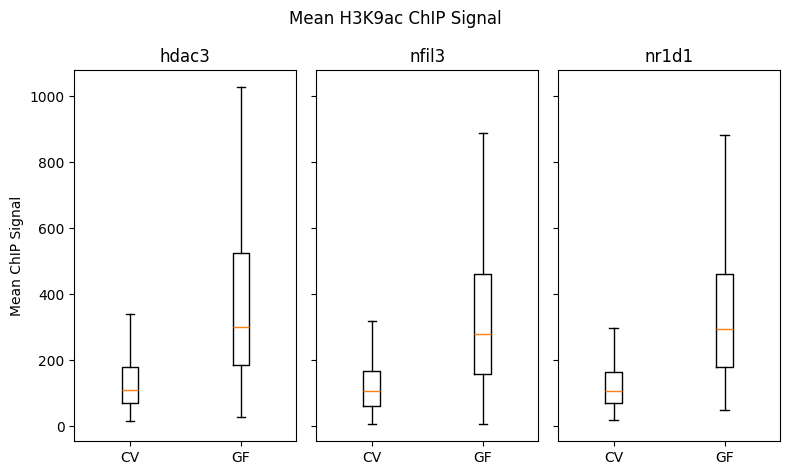

hdac3 t test p-val is 2.3312308248504718e-49 and t-val is -15.751974977436651
nfil3 t test p-val is 1.983287829404803e-29 and t-val is -11.954148834503858
nr1d1 t test p-val is 2.6409856727809476e-89 and t-val is -21.84702173908795

median CV 109.303150888 and median GF 300.29050204
median CV 106.321015692 and median GF 279.86991976
median CV 106.176610848 and median GF 293.678208452


In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=True)

hdac3_mean_CVGF = [dfK9_hdac3['CV_mean'],dfK9_hdac3['GF_mean']]
nfil3_mean_CVGF = [dfK9_nfil3['CV_mean'],dfK9_nfil3['GF_mean']]
nr1d1_mean_CVGF = [dfK9_nr1d1['CV_mean'],dfK9_nr1d1['GF_mean']]

lab_CVGF = ['CV','GF']


ax1.boxplot(hdac3_mean_CVGF,showfliers=False,tick_labels=lab_CVGF)
ax1.set_title('hdac3')
ax1.set_ylabel('Mean ChIP Signal')

ax2.boxplot(nfil3_mean_CVGF,showfliers=False,tick_labels=lab_CVGF)
ax2.set_title('nfil3')

ax3.boxplot(nr1d1_mean_CVGF,showfliers=False,tick_labels=lab_CVGF)
ax3.set_title('nr1d1')

fig.suptitle('Mean H3K9ac ChIP Signal')
fig.set_figwidth(8)
plt.tight_layout()
plt.show()

regulators = ['hdac3','nfil3','nr1d1']
reg_means = [hdac3_mean_CVGF,nfil3_mean_CVGF,nr1d1_mean_CVGF]
for i in range(3):
    t,p = stats.ttest_ind(reg_means[i][0],reg_means[i][1])
    print(regulators[i],'t test p-val is', p, 'and t-val is',t)

print('')

for i in range(3):
    CV,GF = (reg_means[i][0].median(),reg_means[i][1].median())
    print('median CV', CV,'and median GF',GF)


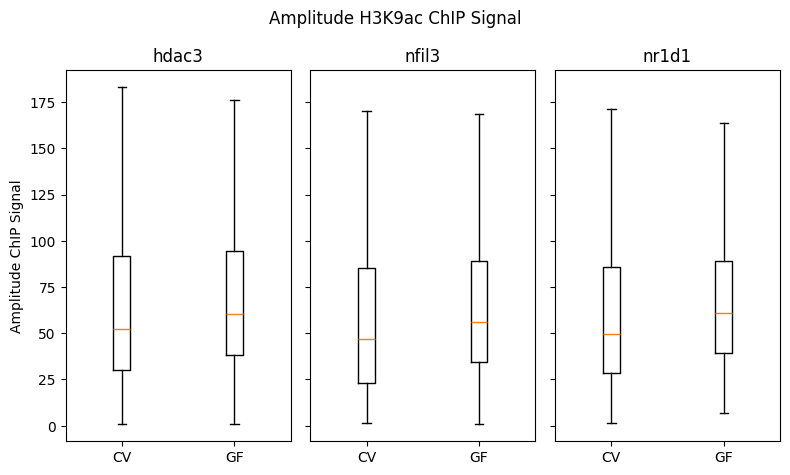

0.8311356814152129
hdac3 t test p-val is 0.8311356814152129 and t-val is -0.2133094648437976
nfil3 t test p-val is 0.4707382915299754 and t-val is -0.7217788758515612
nr1d1 t test p-val is 0.01809547251850067 and t-val is -2.3669174411026255

median CV 52.4520619587 and median GF 60.3278485556
median CV 46.659310633 and median GF 56.2726211944
median CV 49.6579711582 and median GF 60.7942442741


In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)

hdac3_amplitude_CVGF = [dfK9_hdac3['CV_amplitude'], dfK9_hdac3['GF_amplitude']]
nfil3_amplitude_CVGF = [dfK9_nfil3['CV_amplitude'], dfK9_nfil3['GF_amplitude']]
nr1d1_amplitude_CVGF = [dfK9_nr1d1['CV_amplitude'], dfK9_nr1d1['GF_amplitude']]

lab_CVGF = ['CV', 'GF']

ax1.boxplot(hdac3_amplitude_CVGF, showfliers=False, tick_labels=lab_CVGF)
ax1.set_title('hdac3')
ax1.set_ylabel('Amplitude ChIP Signal')

ax2.boxplot(nfil3_amplitude_CVGF, showfliers=False, tick_labels=lab_CVGF)
ax2.set_title('nfil3')

ax3.boxplot(nr1d1_amplitude_CVGF, showfliers=False, tick_labels=lab_CVGF)
ax3.set_title('nr1d1')

fig.suptitle('Amplitude H3K9ac ChIP Signal')
fig.set_figwidth(8)
plt.tight_layout()
plt.show()


t, p = stats.ttest_ind(hdac3_amplitude_CVGF[0],hdac3_amplitude_CVGF[1])
print(p)

reg_amps = [hdac3_amplitude_CVGF,nfil3_amplitude_CVGF,nr1d1_amplitude_CVGF]
for i in range(3):
    t,p = stats.ttest_ind(reg_amps[i][0],reg_amps[i][1])
    print(regulators[i],'t test p-val is', p, 'and t-val is',t)

print('')

for i in range(3):
    CV,GF = (reg_amps[i][0].median(),reg_amps[i][1].median())
    print('median CV', CV,'and median GF',GF)

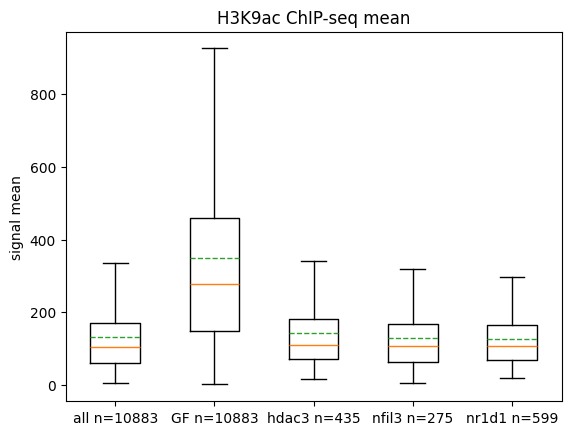

In [16]:
#put mean data in list - K9
df9_mean_all = dfK9['CV_mean']
df9_mean_GF = dfK9['GF_mean']
df9_mean_hdac3 = dfK9_hdac3['CV_mean']
df9_mean_nfil3 = dfK9_nfil3['CV_mean']
df9_mean_nr1d1 = dfK9_nr1d1['CV_mean']

#getting sample size for labeling
lendf = len(df9_mean_all)
lenhdac3 = len(df9_mean_hdac3)
lennfil3 = len(df9_mean_nfil3)
lennr1d1 = len(df9_mean_nr1d1)

df9means = [df9_mean_all,df9_mean_GF, df9_mean_hdac3,df9_mean_nfil3,df9_mean_nr1d1]
df9_label = ['all n='+str(lendf), 'GF n='+str(lendf),'hdac3 n='+str(lenhdac3), 'nfil3 n='+str(lennfil3), 'nr1d1 n='+str(lennr1d1)]
plt.boxplot(df9means,showfliers = False,tick_labels = df9_label,showmeans=True,meanline=True)
plt.ylabel('signal mean')
plt.title('H3K9ac ChIP-seq mean')
plt.show()



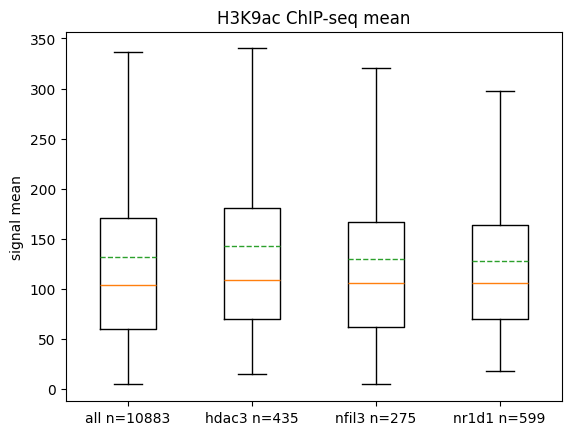

hdac3 n=435 t-test p-val is 0.05912251796646981 and t val is -1.887471392649063
nfil3 n=275 t-test p-val is 0.8613336754563443 and t val is 0.17468073583900498
nr1d1 n=599 t-test p-val is 0.47438958055785996 and t val is 0.7153787623769874

all n=10883 median is 104.137972743
hdac3 n=435 median is 109.303150888
nfil3 n=275 median is 106.321015692
nr1d1 n=599 median is 106.176610848

hdac3 nfil3 t-val 1.5943109154207717 p-val 0.11131269872809893
hdac3 nr1d1 t-val 2.570233057629184 p-val 0.010302340757366262
nfil3 nr1d1 t-val 0.36207263905281356 p-val 0.7173854741567574


In [17]:
#mean data in list - K9

df9_mean_all = dfK9['CV_mean']
df9_mean_hdac3 = dfK9_hdac3['CV_mean']
df9_mean_nfil3 = dfK9_nfil3['CV_mean']
df9_mean_nr1d1 = dfK9_nr1d1['CV_mean']

df9means = [df9_mean_all, df9_mean_hdac3,df9_mean_nfil3,df9_mean_nr1d1]
df9_label = ['all n='+str(lendf), 'hdac3 n='+str(lenhdac3), 'nfil3 n='+str(lennfil3), 'nr1d1 n='+str(lennr1d1)]
plt.boxplot(df9means,showfliers = False,tick_labels = df9_label,showmeans=True,meanline=True)
plt.ylabel('signal mean')
plt.title('H3K9ac ChIP-seq mean')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_mean_all,df9means[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9means[i].median()
    print(df9_label[i],'median is',med)
print('')
#hdac3 nfil3
t,p = stats.ttest_ind(df9_mean_hdac3,df9_mean_nfil3)
print('hdac3 nfil3 t-val',t,'p-val',p)
#hdac3 nr1d1
t,p = stats.ttest_ind(df9_mean_hdac3,df9_mean_nr1d1)
print('hdac3 nr1d1 t-val',t,'p-val',p)
#nfil3 nr1d1
t,p = stats.ttest_ind(df9_mean_nfil3,df9_mean_nr1d1)
print('nfil3 nr1d1 t-val',t,'p-val',p)

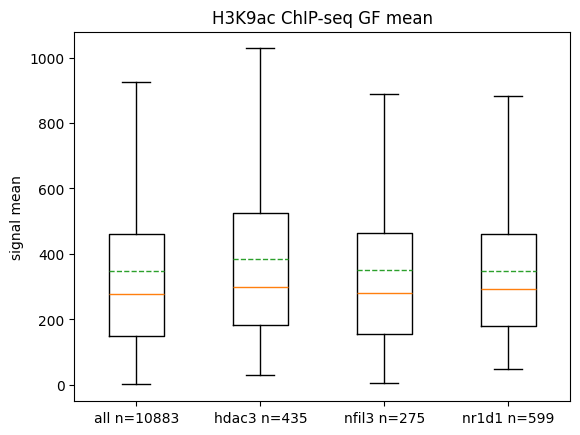

hdac3 n=435 t-test p-val is 0.012000979742045871 and t val is -2.5125213191522655
nfil3 n=275 t-test p-val is 0.91159732394837 and t val is -0.1110265075714007
nr1d1 n=599 t-test p-val is 0.9014602251016011 and t val is 0.12381966982971107

all n=10883 median is 277.513192993
hdac3 n=435 median is 300.29050204
nfil3 n=275 median is 279.86991976
nr1d1 n=599 median is 293.678208452


In [18]:
#GF comparison
#mean data in list - K9
df9_mean_all = dfK9['GF_mean']
df9_mean_hdac3 = dfK9_hdac3['GF_mean']
df9_mean_nfil3 = dfK9_nfil3['GF_mean']
df9_mean_nr1d1 = dfK9_nr1d1['GF_mean']

df9means = [df9_mean_all, df9_mean_hdac3,df9_mean_nfil3,df9_mean_nr1d1]
df9_label = ['all n='+str(lendf), 'hdac3 n='+str(lenhdac3), 'nfil3 n='+str(lennfil3), 'nr1d1 n='+str(lennr1d1)]
plt.boxplot(df9means,showfliers = False,tick_labels = df9_label,showmeans=True,meanline=True)
plt.ylabel('signal mean')
plt.title('H3K9ac ChIP-seq GF mean')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_mean_all,df9means[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9means[i].median()
    print(df9_label[i],'median is',med)

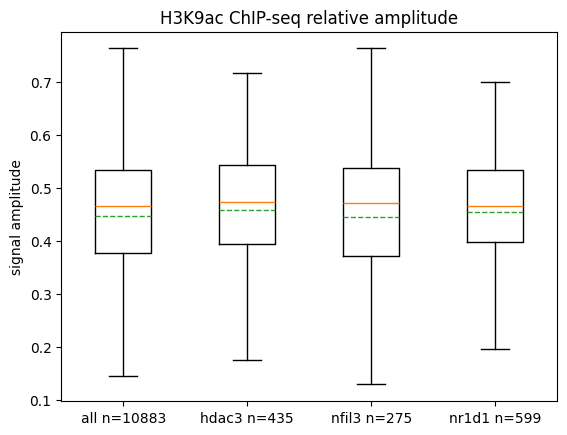

hdac3 n=435 t-test p-val is 0.04596423757854629 and t val is -1.995941296197513
nfil3 n=275 t-test p-val is 0.8499420483866205 and t val is 0.1891967604232478
nr1d1 n=599 t-test p-val is 0.09436095089177875 and t val is -1.6729674498809355

all n=10883 median is 0.4662201512233225
hdac3 n=435 median is 0.4741635367108031
nfil3 n=275 median is 0.47256749630494826
nr1d1 n=599 median is 0.4653128645281068

hdac3 nfil3 t-val 1.4130127413252942 p-val 0.1580914383961733
hdac3 nr1d1 t-val 0.47126876190488887 p-val 0.637548425697333
nfil3 nr1d1 t-val -1.1874304570455174 p-val 0.23538122578198817


In [19]:
#amplitude data in list - K9
df9_amplitude_all = dfK9['CV_rAMP']
df9_amplitude_hdac3 = dfK9_hdac3['CV_rAMP']
df9_amplitude_nfil3 = dfK9_nfil3['CV_rAMP']
df9_amplitude_nr1d1 = dfK9_nr1d1['CV_rAMP']

df9amplitudes = [df9_amplitude_all, df9_amplitude_hdac3, df9_amplitude_nfil3, df9_amplitude_nr1d1]
plt.boxplot(df9amplitudes, showfliers=False, tick_labels=df9_label, showmeans=True, meanline=True)
plt.ylabel('signal amplitude')
plt.title('H3K9ac ChIP-seq relative amplitude')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_amplitude_all,df9amplitudes[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9amplitudes[i].median()
    print(df9_label[i],'median is',med)

print('')
#hdac3 nfil3
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nfil3)
print('hdac3 nfil3 t-val',t,'p-val',p)
#hdac3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nr1d1)
print('hdac3 nr1d1 t-val',t,'p-val',p)
#nfil3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_nfil3,df9_amplitude_nr1d1)
print('nfil3 nr1d1 t-val',t,'p-val',p)


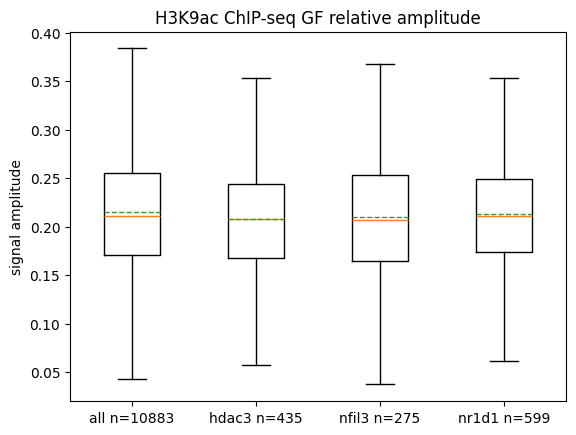

hdac3 n=435 t-test p-val is 0.038358026062058535 and t val is 2.071250263380728
nfil3 n=275 t-test p-val is 0.220449503662297 and t val is 1.2254024239320664
nr1d1 n=599 t-test p-val is 0.5171738714833003 and t val is 0.6477279574546374

all n=10883 median is 0.2106680001642845
hdac3 n=435 median is 0.20807590035410925
nfil3 n=275 median is 0.20631006350532846
nr1d1 n=599 median is 0.21114572537004658


In [20]:
#amplitude data in list - K9
df9_amplitude_all = dfK9['GF_rAMP']
df9_amplitude_hdac3 = dfK9_hdac3['GF_rAMP']
df9_amplitude_nfil3 = dfK9_nfil3['GF_rAMP']
df9_amplitude_nr1d1 = dfK9_nr1d1['GF_rAMP']

df9amplitudes = [df9_amplitude_all, df9_amplitude_hdac3, df9_amplitude_nfil3, df9_amplitude_nr1d1]
plt.boxplot(df9amplitudes, showfliers=False, tick_labels=df9_label, showmeans=True, meanline=True)
plt.ylabel('signal amplitude')
plt.title('H3K9ac ChIP-seq GF relative amplitude')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_amplitude_all,df9amplitudes[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9amplitudes[i].median()
    print(df9_label[i],'median is',med)

In [22]:
dfK9

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH,CV_rAMP,GF_rAMP,rAMP_fold_diff,rAMP_diff
0,chr1_4783493_4786944,chr1,4783493,4786944,4,4785726,4787726,Mrpl15,-,0,...,74.257269,0.933138,355.239153,0.035213,0.003000,0.269018,0.481947,0.209035,2.305585,0.272913
1,chr1_4806713_4811238,chr1,4806713,4811238,6,4805893,4807893,Lypla1,+,0,...,88.160555,20.394261,565.183389,0.188224,0.003424,0.307075,0.528682,0.155986,3.389294,0.372696
2,chr1_4855961_4859931,chr1,4855961,4859931,7,4855694,4857694,Tcea1,+,0,...,85.351211,0.465709,388.566761,0.073235,0.003031,0.271816,0.485485,0.219656,2.210202,0.265829
3,chr1_5082507_5084687,chr1,5082507,5084687,8,5081173,5083173,Atp6v1h,+,0,...,59.936170,2.121451,272.175974,0.285309,0.004010,0.359593,0.548986,0.220211,2.492998,0.328775
4,chr1_6211969_6217033,chr1,6211969,6217033,9,6212662,6214662,Rb1cc1,+,0,...,86.027961,1.014155,660.824894,0.053991,0.003031,0.271816,0.561751,0.130183,4.315097,0.431568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10878,chrY_897172_899608,chrY,897172,899608,17782,895788,897788,Kdm5d,+,0,...,40.242580,0.376119,245.675463,0.099870,0.003045,0.273031,0.677113,0.163804,4.133681,0.513309
10879,chrY_1009337_1011988,chrY,1009337,1011988,17783,1008612,1010612,Eif2s3y,+,0,...,57.738414,2.203537,251.003387,0.301645,0.004119,0.369401,0.617209,0.230030,2.683162,0.387178
10880,chrY_1244057_1246429,chrY,1244057,1246429,17784,1245738,1247738,Uty,-,0,...,25.588807,0.280457,200.309732,0.131451,0.003084,0.276534,0.848780,0.127746,6.644266,0.721034
10881,chrY_1284701_1286964,chrY,1284701,1286964,17785,1286613,1288613,Ddx3y,-,0,...,46.007777,1.851386,241.583948,0.241422,0.003741,0.335484,0.553105,0.190442,2.904321,0.362663


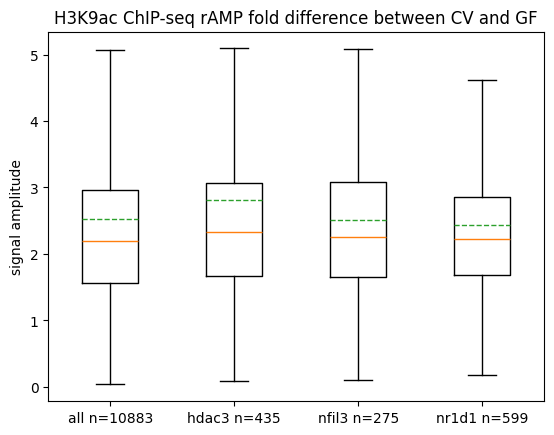

hdac3 n=435 t-test p-val is 0.01937727953167498 and t val is -2.338526325625614
nfil3 n=275 t-test p-val is 0.9089782760384548 and t val is 0.11432997888338457
nr1d1 n=599 t-test p-val is 0.3409186905683642 and t val is 0.9523911634843307

all n=10883 median is 2.192677727053652
hdac3 n=435 median is 2.3282023771966665
nfil3 n=275 median is 2.2570176397734762
nr1d1 n=599 median is 2.2310743019852195

hdac3 nfil3 t-val 1.2054506927057815 p-val 0.22843208756802652
hdac3 nr1d1 t-val 2.1709030926593353 p-val 0.03016586122790186
nfil3 nr1d1 t-val 0.7346885858668799 p-val 0.4627266951032032


In [25]:
#amplitude data in list - K9
col = 'rAMP_fold_diff'
df9_amplitude_all = dfK9[col]
df9_amplitude_hdac3 = dfK9_hdac3[col]
df9_amplitude_nfil3 = dfK9_nfil3[col]
df9_amplitude_nr1d1 = dfK9_nr1d1[col]

df9amplitudes = [df9_amplitude_all, df9_amplitude_hdac3, df9_amplitude_nfil3, df9_amplitude_nr1d1]
plt.boxplot(df9amplitudes, showfliers=False, tick_labels=df9_label, showmeans=True, meanline=True)
plt.ylabel('signal amplitude')
plt.title('H3K9ac ChIP-seq rAMP fold difference between CV and GF')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_amplitude_all,df9amplitudes[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9amplitudes[i].median()
    print(df9_label[i],'median is',med)

print('')
#hdac3 nfil3
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nfil3)
print('hdac3 nfil3 t-val',t,'p-val',p)
#hdac3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nr1d1)
print('hdac3 nr1d1 t-val',t,'p-val',p)
#nfil3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_nfil3,df9_amplitude_nr1d1)
print('nfil3 nr1d1 t-val',t,'p-val',p)

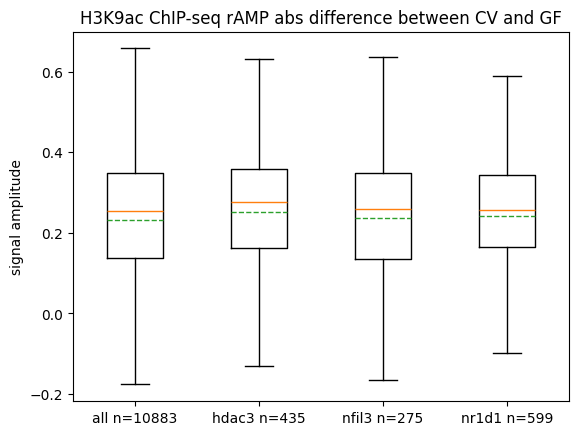

hdac3 n=435 t-test p-val is 0.017343422356388347 and t val is -2.3796954796309095
nfil3 n=275 t-test p-val is 0.6984194537313823 and t val is -0.38746490432499314
nr1d1 n=599 t-test p-val is 0.12724321819258888 and t val is -1.525174130759016

all n=10883 median is 0.25373491743743104
hdac3 n=435 median is 0.2754979862710556
nfil3 n=275 median is 0.2582281874486743
nr1d1 n=599 median is 0.2571883359324218

hdac3 nfil3 t-val 1.2450461203512677 p-val 0.2135267274780293
hdac3 nr1d1 t-val 0.9186182053390097 p-val 0.3585099520724351
nfil3 nr1d1 t-val -0.5992030683892696 p-val 0.5491931167296215


In [26]:
#amplitude data in list - K9
col = 'rAMP_diff'
df9_amplitude_all = dfK9[col]
df9_amplitude_hdac3 = dfK9_hdac3[col]
df9_amplitude_nfil3 = dfK9_nfil3[col]
df9_amplitude_nr1d1 = dfK9_nr1d1[col]

df9amplitudes = [df9_amplitude_all, df9_amplitude_hdac3, df9_amplitude_nfil3, df9_amplitude_nr1d1]
plt.boxplot(df9amplitudes, showfliers=False, tick_labels=df9_label, showmeans=True, meanline=True)
plt.ylabel('signal amplitude')
plt.title('H3K9ac ChIP-seq rAMP abs difference between CV and GF')
plt.show()

for i in range(1,4):
    t, pval = stats.ttest_ind(df9_amplitude_all,df9amplitudes[i])
    print(df9_label[i],'t-test p-val is',pval,'and t val is',t)
print('')
for i in range(4):
    med = df9amplitudes[i].median()
    print(df9_label[i],'median is',med)

print('')
#hdac3 nfil3
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nfil3)
print('hdac3 nfil3 t-val',t,'p-val',p)
#hdac3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_hdac3,df9_amplitude_nr1d1)
print('hdac3 nr1d1 t-val',t,'p-val',p)
#nfil3 nr1d1
t,p = stats.ttest_ind(df9_amplitude_nfil3,df9_amplitude_nr1d1)
print('nfil3 nr1d1 t-val',t,'p-val',p)